In [41]:
import pandas as pd
import numpy as np

# Pfad ggf. anpassen, je nachdem wo dein Notebook liegt
df = pd.read_csv("../data/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [42]:
df.info()
df[['type', 'title', 'rating', 'duration', 'listed_in']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,type,title,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [43]:
def parse_duration(d):
    if pd.isna(d):
        return None
    try:
        num_str = str(d).split()[0]
        return int(num_str)
    except:
        return None

df['duration_num'] = df['duration'].apply(parse_duration)

df[['type', 'duration', 'duration_num']].head(10)

,type,duration,duration_num
0,Movie,90 min,90.0
1,TV Show,2 Seasons,2.0
2,TV Show,1 Season,1.0
3,TV Show,1 Season,1.0
4,TV Show,2 Seasons,2.0
5,TV Show,1 Season,1.0
6,Movie,91 min,91.0
7,Movie,125 min,125.0
8,TV Show,9 Seasons,9.0
9,Movie,104 min,104.0


In [44]:
df['duration_num'].isna().sum()


np.int64(3)

In [45]:
df = df.dropna(subset=['duration_num']).reset_index(drop=True)


In [46]:
rating_map = {
    "TV-Y": "Kids",
    "TV-Y7": "Kids",
    "TV-G": "Kids",
    "G": "Kids",
    "PG": "Kids",
    "TV-PG": "Kids",
    "PG-13": "Teens",
    "TV-14": "Teens",
    "R": "Adults",
    "NC-17": "Adults",
    "TV-MA": "Adults"
}

df['rating_simplified'] = df['rating'].map(rating_map)
df['rating_simplified'] = df['rating_simplified'].fillna("Other")

df['rating_simplified'].value_counts()

rating_simplified
Adults    4009
Teens     2650
Kids      2052
Other       93
Name: count, dtype: int64

In [47]:
rating_dummies = pd.get_dummies(df["rating_simplified"], prefix="rating")
rating_dummies.head()


,rating_Adults,rating_Kids,rating_Other,rating_Teens
0,False,False,False,True
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [48]:
df = df.dropna(subset=['duration_num'])
df['duration_num'].isna().sum()


np.int64(0)

In [49]:
type_dummies = pd.get_dummies(df['type'], prefix='type')
type_dummies.head()


,type_Movie,type_TV Show
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True


In [50]:
rating_dummies = pd.get_dummies(df['rating_simplified'], prefix='rating')
rating_dummies.head()


,rating_Adults,rating_Kids,rating_Other,rating_Teens
0,False,False,False,True
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [51]:
genres = df['listed_in'].str.get_dummies(sep=', ')
genres.head()


,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [52]:
numeric_features = df[['release_year', 'duration_num']]

features = pd.concat(
    [numeric_features, type_dummies, rating_dummies, genres],
    axis=1
)

features.shape, features.head()


((8804, 50),
    release_year  duration_num  type_Movie  type_TV Show  rating_Adults  \
 0          2020          90.0        True         False          False   
 1          2021           2.0       False          True           True   
 2          2021           1.0       False          True           True   
 3          2021           1.0       False          True           True   
 4          2021           2.0       False          True           True   
 
    rating_Kids  rating_Other  rating_Teens  Action & Adventure  \
 0        False         False          True                   0   
 1        False         False         False                   0   
 2        False         False         False                   0   
 3        False         False         False                   0   
 4        False         False         False                   0   
 
    Anime Features  ...  TV Action & Adventure  TV Comedies  TV Dramas  \
 0               0  ...                      0           

### Summary of Feature Engineering

We transformed several original columns into numerical, model-ready features:

- **duration → duration_num**  
  Extracted the number of minutes (movies) or number of seasons (TV shows).

- **rating → rating_simplified**  
  Grouped into the categories: *Kids*, *Teens*, *Adults*, *Other*.

- **type → One-Hot-Encoding**  
  `type_Movie`, `type_TV Show`.

- **listed_in → Multi-Hot-Encoding**  
  Created 40+ binary genre columns.

- **Combined all features** into one DataFrame with **~50 numerical columns**, ready for clustering.


## 4. Clustering der Netflix-Titel

In diesem Abschnitt gruppieren wir die Netflix-Titel mithilfe von K-Means-Clustering
auf Basis der zuvor erstellten numerischen Features. Ziel ist es, ähnliche Inhalte
(Genres, Dauer, Zielgruppe etc.) in Cluster zu unterteilen und diese später zu interpretieren.


In [53]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.13.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 32.4 MB/s  0:00:00eta 0:00:01
Using cached scipy-1.13.1-cp39-cp39-macosx_10_9_x86_64.whl (39.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# 1) Nur Zeilen verwenden, bei denen alle Features vorhanden sind
X = features.dropna().copy()

print("Feature-Matrix shape:", X.shape)


Feature-Matrix shape: (8804, 50)


In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled shape:", X_scaled.shape)


Scaled shape: (8804, 50)


In [57]:
sil_scores = {}
K_VALUES = range(3, 9)  # k = 3,4,5,6,7,8

for k in K_VALUES:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores[k] = score
    print(f"k = {k}, silhouette_score = {score:.4f}")

# bestes k auswählen
best_k = max(sil_scores, key=sil_scores.get)
print("\nBest k according to silhouette score:", best_k)


k = 3, silhouette_score = 0.0487
k = 4, silhouette_score = 0.1139
k = 5, silhouette_score = 0.0819
k = 6, silhouette_score = 0.1043
k = 7, silhouette_score = 0.1123
k = 8, silhouette_score = 0.1512

Best k according to silhouette score: 8


In [58]:
best_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = best_kmeans.fit_predict(X_scaled)

# Labels zurück in ein DataFrame
X_clusters = X.copy()
X_clusters["cluster"] = cluster_labels

X_clusters.head()


,release_year,duration_num,type_Movie,type_TV Show,rating_Adults,rating_Kids,rating_Other,rating_Teens,Action & Adventure,Anime Features,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,cluster
0,2020,90.0,True,False,False,False,False,True,0,0,...,0,0,0,0,0,0,0,0,0,2
1,2021,2.0,False,True,True,False,False,False,0,0,...,0,1,0,1,0,0,0,0,0,5
2,2021,1.0,False,True,True,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,5
3,2021,1.0,False,True,True,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,6
4,2021,2.0,False,True,True,False,False,False,0,0,...,1,0,0,0,0,0,0,0,0,1


In [59]:
df["cluster"] = np.nan  # erst mal leere Spalte
df.loc[X.index, "cluster"] = cluster_labels
df["cluster"] = df["cluster"].astype("Int64")  # optional: integer-Typ mit NaNs


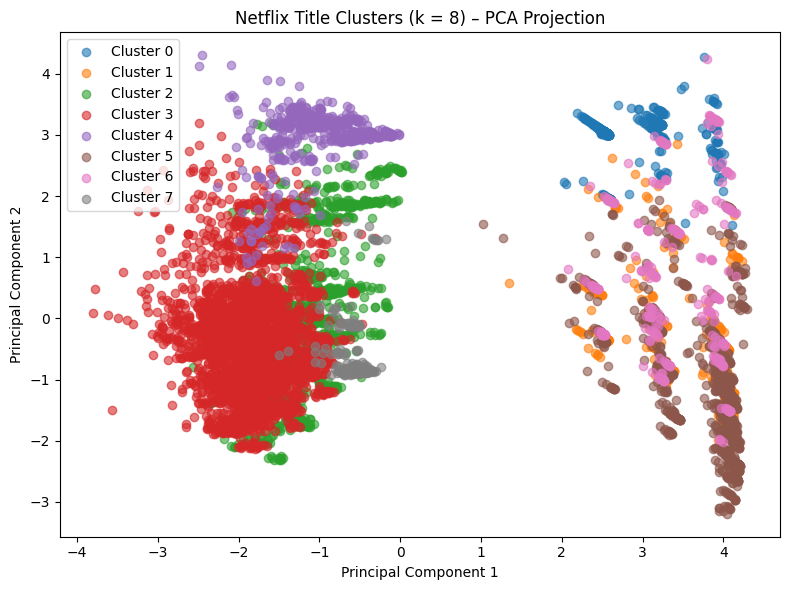

In [60]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"],
    index=X.index
)
pca_df["cluster"] = cluster_labels

plt.figure(figsize=(8, 6))
for c in sorted(pca_df["cluster"].unique()):
    subset = pca_df[pca_df["cluster"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {c}", alpha=0.6)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Netflix Title Clusters (k = {best_k}) – PCA Projection")
plt.legend()
plt.tight_layout()
plt.show()
